# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from ConsumerProblem import HouseholdSpecializationModelClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

1. Improve explanation of code

We first update the HouseholdSpecializationModelClass such that the consumption of home production supports $\sigma\ne1$.
We then show how $\frac{H_F}{H_M}$ changes for each combination of $\alpha\in\{0.25,0.50,0.75\}$ and $\sigma\in\{0.5,1.0,1.5\}$.

1. When $\alpha$ increases the productivity of females relative to males increases. Relatively more productive females increases the optimal quantity of female relative to male household work.
2. As $\sigma$ increases the substitutability between male and female household work increases. Higher substitutability cp. magnifies a given difference in household work between males and females.

The differences in home productivity give rise to differences in relative home production as households make a larger division of labor between work in the household and in the market. The potential for division of labor increases as substitutability increases. 

In [115]:
#a. Setting parameters and generating empty lists
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5, 1.0, 1.5]
alpha_list2 = []
sigma_list2 = []
HF_list = []
HM_list = []
HF_HM_list = []

#b. Generating Household as class
Household = HouseholdSpecializationModelClass()

#c. Loops through each combination of alpha and sigma in list. Solves the model for each combination and appends result to empty lists
for i_alpha,alpha in enumerate(alpha_list):
    for i_sigma,sigma in enumerate(sigma_list):
            #c.1 Sets parameters in class equal to parameter in list
            Household.par.alpha = alpha
            Household.par.sigma = sigma

            #c.2 Solves model
            result = Household.solve_discrete()

            #c.3 Appends results
            alpha_list2.append(alpha)
            sigma_list2.append(sigma)
            HF_list.append(result.HF)
            HM_list.append(result.HM)
            HF_HM_list.append(result.HF/result.HM)

#d. Generating DataFrame df to show results
df= pd.DataFrame().from_dict({'alpha':alpha_list2,'sigma':sigma_list2,'HF':HF_list,'HM':HM_list,'HF/HM':HF_HM_list})
df['HF/HM'] = df['HF/HM'].apply(lambda x: f'{x:2.2f}') 
df

c:\Users\krist\OneDrive - Københavns Universitet\8. semester\Introduction to programming and numerical analysis\projects-2023-magnus-kristian\inauguralproject\ConsumerProblem_5.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


,alpha,sigma,HF,HM,HF/HM
0,0.25,0.5,24.0,6.0,4.00
1,0.25,1.0,24.0,5.0,4.80
2,0.25,1.5,24.0,4.0,6.00
3,0.50,0.5,24.0,5.0,4.80
4,0.50,1.0,24.0,3.5,6.86
5,0.50,1.5,24.0,2.0,12.00
6,0.75,0.5,24.0,4.0,6.00
7,0.75,1.0,24.0,1.5,16.00
8,0.75,1.5,24.0,0.5,48.00


# Question 2

1. Explain code
2. Comment on results

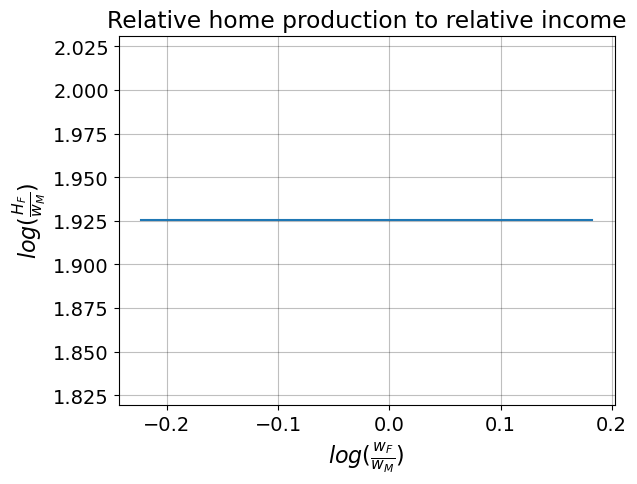

In [116]:
#a. Setting parameters
log_HF_HM_list = []
log_wF_wM_list = []

#b. Generating Household
Household = HouseholdSpecializationModelClass()

#c. Loops through values of wF_vec, returns (x,y)-variables
for wF in Household.par.wF_vec:
            Household.par.wF = wF
            result = Household.solve_discrete()
            log_HF_HM_list.append(np.log(result.HF/result.HM))
            log_wF_wM_list.append(np.log(Household.par.wF/Household.par.wM))

# d. create the figure
fig = plt.figure()

# e. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_wF_wM_list,log_HF_HM_list)

ax.set_title('Relative home production to relative income')
ax.set_xlabel(r'$log(\frac{w_F}{w_M})$', fontsize=16)
ax.set_ylabel(r'$log(\frac{H_F}{w_M})$', fontsize=16);

# Question 3

1. Explain code
2. Discuss results

Note: Consider using both minimization methods and argue why "Nelder-Mead" is optimal (maybe wait for exam?)

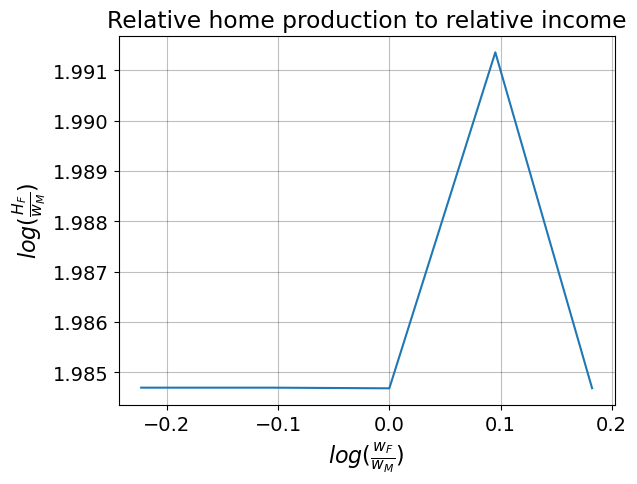

In [117]:
#a. Setting parameters
log_HF_HM_list = []
log_wF_wM_list = []

#b. Generating Household
Household = HouseholdSpecializationModelClass()

#c. Loops through values of wF_vec, returns (x,y)-variables
for wF in Household.par.wF_vec:
            Household.par.wF = wF
            result = Household.solve()
            log_HF_HM_list.append(np.log(result.HF/result.HM))
            log_wF_wM_list.append(np.log(Household.par.wF/Household.par.wM))

# d. create the figure
fig = plt.figure()

# e. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_wF_wM_list,log_HF_HM_list)

ax.set_title('Relative home production to relative income')
ax.set_xlabel(r'$log(\frac{w_F}{w_M})$', fontsize=16)
ax.set_ylabel(r'$log(\frac{H_F}{w_M})$', fontsize=16);

# Question 4

1. Explain code
2. Comment on results
3. Interpret results: Unrealistic that alpha=.98 to match data.

In [118]:
#a. Generate Household
Household=HouseholdSpecializationModelClass()

#b. Based on initial guesses of alpha and beta, minimize the sq. dev. from beta0 and beta1, by changina alpha and sigma.
Household.estimate()

#c. Print resuls
df2= pd.DataFrame().from_dict({'wF':Household.par.wF_vec,'LM':Household.sol.LM_vec,'HM':Household.sol.HM_vec,'LF':Household.sol.LF_vec,'HF':Household.sol.HF_vec})
print(df2)
print(f'\n alpha = {Household.sol.alpha:.3f}, sigma = {Household.sol.sigma:.3f} -> beta0 = {Household.sol.beta0:.3f}, beta1 = {Household.sol.beta1:.3f}')

c:\Users\krist\OneDrive - Københavns Universitet\8. semester\Introduction to programming and numerical analysis\projects-2023-magnus-kristian\inauguralproject\ConsumerProblem_5.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\krist\OneDrive - Københavns Universitet\8. semester\Introduction to programming and numerical analysis\projects-2023-magnus-kristian\inauguralproject\ConsumerProblem_5.py:62: RuntimeWarning: overflow encountered in double_scalars
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


    wF        LM        HM            LF         HF
0  0.8  6.198531  6.089247  1.000000e-08  13.406097
1  0.9  6.198488  6.089286  1.000000e-08  13.406008
2  1.0  6.198505  6.089207  1.568422e-08  13.406001
3  1.1  6.085439  6.107973  1.264021e-01  13.286395
4  1.2  4.959874  6.293171  1.289944e+00  12.213700

 alpha = 0.013, sigma = 0.164 -> beta0 = 0.759, beta1 = -0.249


## Question 5

In [119]:
#Kristian og Kristian idé:
#Inkludér wM/wF*HM som komponent, der giver disnytte (gælder kun for manden) 
#Hvis kvinde tjener mest er der ingen ændringer, men når manden tjener mest, så vil han ikke arbejde hjemme.

#a. Generate Household
Household=HouseholdSpecializationModelClass()

#b. Based on initial guesses of alpha and beta, minimize the sq. dev. from beta0 and beta1, by changina alpha and sigma.
#The method has to be augmented, such that only one parameter can be chosen for minimization.
Household.estimate()

#c. Print resuls
df2= pd.DataFrame().from_dict({'wF':Household.par.wF_vec,'LM':Household.sol.LM_vec,'HM':Household.sol.HM_vec,'LF':Household.sol.LF_vec,'HF':Household.sol.HF_vec})
print(df2)
print(f'\n max = {Household.par.max:.3f}, sigma = {Household.sol.sigma:.3f} -> beta0 = {Household.sol.beta0:.3f}, beta1 = {Household.sol.beta1:.3f}')

c:\Users\krist\OneDrive - Københavns Universitet\8. semester\Introduction to programming and numerical analysis\projects-2023-magnus-kristian\inauguralproject\ConsumerProblem_5.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\krist\OneDrive - Københavns Universitet\8. semester\Introduction to programming and numerical analysis\projects-2023-magnus-kristian\inauguralproject\ConsumerProblem_5.py:62: RuntimeWarning: overflow encountered in double_scalars
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


    wF        LM        HM            LF         HF
0  0.8  6.198531  6.089247  1.000000e-08  13.406097
1  0.9  6.198488  6.089286  1.000000e-08  13.406008
2  1.0  6.198505  6.089207  1.568422e-08  13.406001
3  1.1  6.085439  6.107973  1.264021e-01  13.286395
4  1.2  4.959874  6.293171  1.289944e+00  12.213700

 max = 0.013, sigma = 0.164 -> beta0 = 0.759, beta1 = -0.249
